Libraries

In [1]:
#pip install opencv-contrib-python

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [3]:
image_path = '1.jpg'
threshold_fiber=175

Code main body

In [4]:
img0 = cv2.imread(image_path)           #read any image
gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) #makes from RGB gray scale [3]->[1]
gray0_hist = cv2.calcHist([gray0], [0], None, [256], [0, 256])

min_val = np.min(gray0)
max_val = np.max(gray0)
print('Minimum pixel value -',min_val)
print('Maximum Pixel value - ',max_val)
norm = ((gray0 - min_val) / (max_val - min_val) * 255).astype(np.uint8)
norm_hist = cv2.calcHist([norm], [0], None, [256], [0, 256])

grouped = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) #makes from RGB gray scale [3]->[1]

x,y = np.shape(gray0)

cnt_fiber=0
cnt_matrix=0
cnt_defect=0
#threshold_fiber=175

for i in range(x):            
    j=0                       
    for j in range(y):     
         if norm[i][j]>threshold_fiber:
             grouped[i][j]=255 #makewhite - fiber
             cnt_fiber=cnt_fiber+1
         elif norm[i][j]<=threshold_fiber and norm[i][j]>50:
             grouped[i][j]=100 #makegray - resin
             cnt_matrix=cnt_matrix+1
         else:
             grouped[i][j]=0 #make black - void
             cnt_defect=cnt_defect+1
             
hist_grouped = cv2.calcHist([grouped], [0], None, [256], [0, 256])

print('Vertical Length:', x)
print('Horizontal length:', y)
print(f'Total area: {x*y}')

print(f'Fiber count: {cnt_fiber}')
print(f'Matrix pixel: {cnt_matrix}')
print(f'Defect pixel: {cnt_defect}')
print(f'Count of fiber+ matrix+ defect : {cnt_fiber+cnt_matrix+cnt_defect}')
print(f'FVF: {cnt_fiber/(x*y)}')
print(f'Defect: {cnt_defect/(x*y)}')

im3 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
a, b = np.shape(gray0)  # <<< Moved here before using in loop
i = 0
cnt_fail = 0
for i in range(a):            
    j = 0                       
    for j in range(b):        
        if gray0[i, j] == norm[i, j]:  # if same value and same position then ..
            im3[i, j] = 255
        else:
            im3[i, j] = 0  # else make black
            cnt_fail = cnt_fail + 1
            
im3_hist = cv2.calcHist([im3], [0], None, [256], [0, 256])


r1 = norm[1][3]
print('Normalized grayscale value in the original image :',r1)
r2 = grouped[1][3]
print('The classification of the pixel in resultend image:', r2)

Minimum pixel value - 13
Maximum Pixel value -  89
Vertical Length: 300
Horizontal length: 400
Total area: 120000
Fiber count: 63123
Matrix pixel: 49643
Defect pixel: 7234
Count of fiber+ matrix+ defect : 120000
FVF: 0.526025
Defect: 0.060283333333333335
Normalized grayscale value in the original image : 23
The classification of the pixel in resultend image: 0


Output images and its Histograms

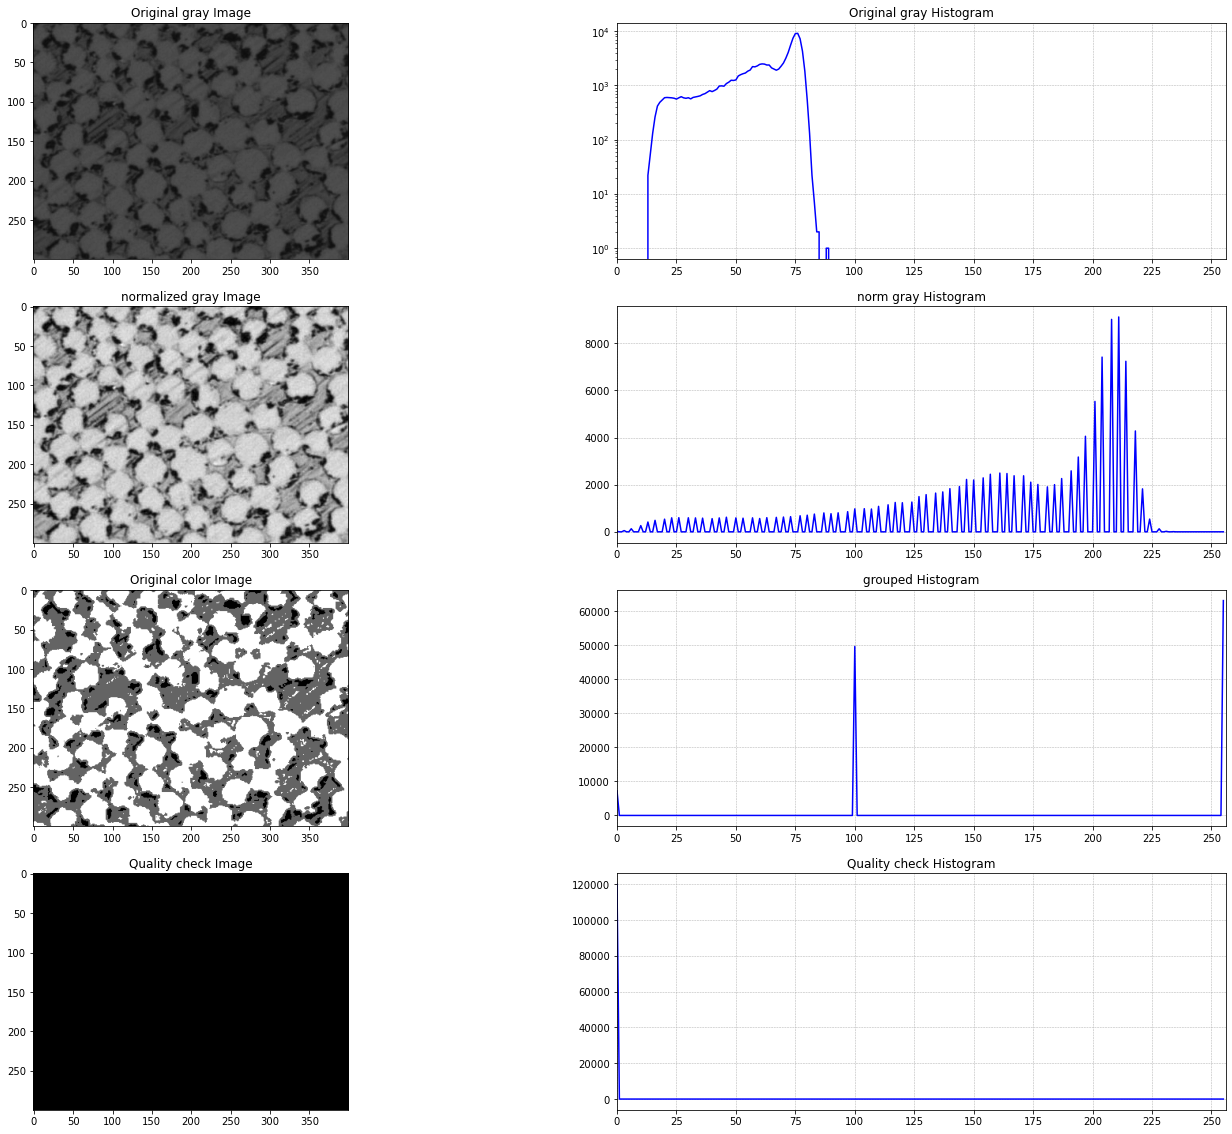

In [5]:
plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
plt.imshow(gray0, cmap='gray', vmin=0, vmax=255)
plt.title('Original gray Image')


plt.subplot(4, 2, 2)
plt.plot(gray0_hist, color='blue')
plt.yscale('log')
plt.title('Original gray Histogram')
plt.xlim([0, 256])
plt.xticks(np.arange(0, 257, 25)) 
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(4, 2, 3)
plt.imshow(norm, cmap='gray', vmin=0, vmax=255)
plt.title('normalized gray Image')

plt.subplot(4, 2, 4)
plt.plot(norm_hist, color='blue')
plt.title('norm gray Histogram')
plt.xlim([0, 256])
plt.xticks(np.arange(0, 257, 25)) 
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(4, 2, 5)
plt.imshow(grouped, cmap='gray', vmin=0, vmax=255)
plt.title('Original color Image')

plt.subplot(4, 2, 6)
plt.plot(hist_grouped, color='blue')
plt.title('grouped Histogram')
plt.xlim([0, 256])
plt.xticks(np.arange(0, 257, 25)) 
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(4, 2, 7)
plt.imshow(im3, cmap='gray', vmin=0, vmax=255)
plt.title('Quality check Image')

plt.subplot(4, 2, 8)
plt.plot(im3_hist, color='blue')
plt.title('Quality check Histogram')
plt.xlim([0, 256])
plt.xticks(np.arange(0, 257, 25)) 
plt.grid(True, linestyle='--', linewidth=0.5)